In [1]:
import hess_pipeline_util as hpu
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 7]

In [5]:
tag_len = 7
tags = {}
for rec in hpu.sequence_strider('*_R2.fastq.gz', seqs_per_file=2000):
    try:
        tags[rec[:tag_len]] += 1
    except KeyError:
        tags[rec[:tag_len]] = 1
tag_items = sorted(tags.items(), key=lambda x: x[1],reverse=True)


    

[('gtgaacg', 2098), ('gaggagg', 94), ('agcagca', 93), ('ctgctga', 87), ('gaggaga', 85), ('ctgctgg', 84), ('gccgcca', 77), ('ctggcca', 77), ('gccgccg', 70), ('acccccg', 68)]


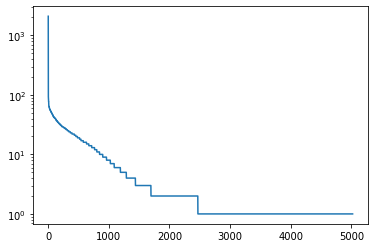

In [14]:
print(tag_items[:10])
fig, ax = plt.subplots()
b = ax.semilogy(range(len(tags)), [el[1] for el in tag_items])



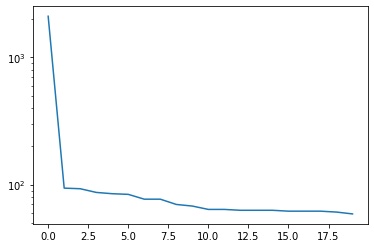

In [18]:
fig, ax = plt.subplots()
b = ax.semilogy(range(20), [el[1] for el in tag_items][:20])


In [23]:
CNT_MAX = 500
SKIP = 100
indel_hist = [0 for i in range(len(hpu.REF))]
total_cnt = 0
for ko_file in hpu.FASTQ_HOME.glob('*_KO_*1.fastq.gz'):
    cnt = 0
    with gzip.open(ko_file,'rt') as f:
        print(ko_file)
        for rec in FastqGeneralIterator(f):
            cnt += 1
            if not cnt%SKIP:
                indel_pos = hpu.get_first_indel_pos(hpu.REF, rec[1].lower())
                if indel_pos:
                    indel_hist[indel_pos] += 1
                if cnt >= CNT_MAX*SKIP: 
                    total_cnt += cnt/SKIP
                    break

indel_hist_n = [100*el/total_cnt for el in indel_hist] 
indel_cnt = sum(indel_hist)
    
        

/w4home/jsteill/Hess/Data/Hess_Fastqs/Nuc_KO_Rep2_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/Nuc_KO_Rep1_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/DDR_ABA_KO_Rep2_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/Nuc_ABA_KO_Rep2_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/DDR_KO_Rep2_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/DDR_ABA_KO_Rep1_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/Nuc_ABA_KO_Rep1_R1.fastq.gz
/w4home/jsteill/Hess/Data/Hess_Fastqs/DDR_KO_Rep1_R1.fastq.gz


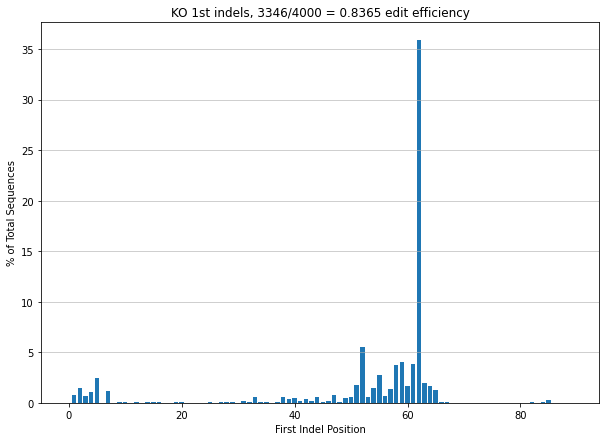

In [25]:




                                                  
plt.bar(range(len(hpu.REF)),indel_hist_n)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('First Indel Position')
plt.ylabel('% of Total Sequences')
plt.title(f'KO 1st indels, {indel_cnt}/{int(total_cnt)} = {indel_cnt/total_cnt} edit efficiency')
plt.savefig('KO_indel_histogram_survey.png')



#print(sum(indel_hist), total_cnt)
#print(indel_hist)
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [20]:
print(f'The alignment starts from reference position {alignment.r_pos}')
alignment.cigar

NameError: name 'alignment' is not defined

In [27]:
r_pos = alignment.r_pos
for cig in alignment.cigar:
    #print(cig, cig[1], cig[1] in )
    if cig[1] not in "ID":
        r_pos += cig[0]
    else:
        indel = cig[1]
        print(f'The first indel is a {indel} and is at reference position {r_pos}')
        break

The first indel is a D and is at reference position 62
